<a href="https://colab.research.google.com/github/cristina-ap/PMP-2024/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Media a posteriori a lui λ: 16.4545
Modul a posteriori al lui λ: 16.3668
Intervalul HDI de 94% pentru λ: [14.2348, 18.7992]



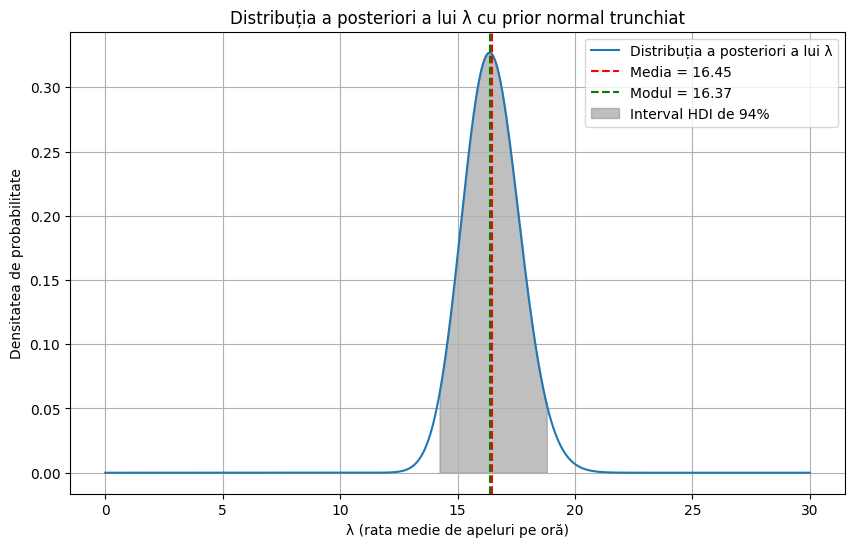

In [7]:
k = 180
T = 10
apeluri_ora = 18
ds = 5

alpha_prior = 1
beta_prior = 1

lambda_values = np.linspace(0.001, 30, 1000)  # or other range of interest

# Calculate the Gamma PDF
prior_pdf = stats.gamma.pdf(lambda_values, a=alpha_prior, scale=1/beta_prior)

likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

# Calculăm distribuția a posteriori ne-normalizată
unnormalized_posterior = likelihood * prior_pdf

# Normalizăm distribuția a posteriori
posterior_pdf = unnormalized_posterior / np.trapz(unnormalized_posterior, lambda_values)

# Calculăm media a posteriori a lui λ
mean_lambda = np.trapz(lambda_values * posterior_pdf, lambda_values)

# Calculăm modulul a posteriori al lui λ (valoarea λ unde posteriorul atinge maximul)
mode_index = np.argmax(posterior_pdf)
mode_lambda = lambda_values[mode_index]

# Calculăm intervalul HDI de 94%
cumulative = np.cumsum(posterior_pdf) * (lambda_values[1] - lambda_values[0])
lower_idx = np.where(cumulative >= 0.03)[0][0]
upper_idx = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_idx]
upper_bound = lambda_values[upper_idx]

print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

# Vizualizarea distribuției a posteriori
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distribuția a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.title('Distribuția a posteriori a lui λ cu prior normal trunchiat')
plt.xlabel('λ (rata medie de apeluri pe oră)')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()
